# Visualizing Fire Scars with False Color 

## HWK 4: EDS 220

Emma Bea Mitchell | November 22, 2024

[Github repository link](https://github.com/emmabeamitchell/eds220-hwk4)

#### About the notebook:

The purpose of this notebook is to explore `landsat` data, and then use both true and false color imagery to show the benefits of using false color imagery. We used the `landsat` data, combined with the `thomas_fire` data to map the effects of the fire. 

When looking at this notebook, the highlights are the intial exploration of the `landsat` data, the removal of the band dimensions and the true and false color imagery. Pay particular attention to the differences and benefits of the true and false imagery, and how the false imagery highlights the effects of fire. The most important part is the false color imagery map. 

#### About the data:

The `landsat` data is a simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. The data was retrieved from the [Microsoft Planetary Computer Data Catalogue](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) and pre-processed to remove data outside land and coarsen the spatial resolution. 

The `Thomas_fire` data is a subset of the shapefile from [California Fires (all) from Data.gov](https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436), which contains fire data for the whole of California. In the notebook `hwk4-task2-fire-perimeter-MITCHEL.ipynb` we data only from the 2017 Thomas Fire and export that data. In this notebook, we take advantage of that data for our `thomas_fire` variable. 

#### References:

Microsoft Planetary Computer Data Catalogue, Landsat collection 2 Level-2 [Data file] Available from: https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2. Access date: November 22, 2024.

Data.gov Data Catalogue, California Fire Perimeters (all) [Data file] Available from: https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436. Access date: November 22, 2024.

### Final Output

The final visualization for this notebook is the following map of false color imagery of the land in and surrounding the Thomas Fire perimeter

<img src="landsat_map_thomas_fire.png" alt="Landsat Map of Thomas Fire" width="400"/>

In [1]:
# Load in libraries 

import os

import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Polygon

import rioxarray as rioxr
import xarray as xr

## True Color Image

In [2]:
# Load in landsat data using `os` and import it using `rioxr.open_rasterio()`
root = os.path.join('/',
                  'courses',
                  'EDS220',
                  'data',
                  'hwk4_landsat_data')

fp = os.path.join(root,
                 'landsat8-2018-01-26-sb-simplified.nc')

landsat = rioxr.open_rasterio(fp)

# Load in thomas_fire data using `os`
path = os.path.join('data',
                   'thomas_fire.shp')

thomas_fire = gpd.read_file(path)

##### Data Exploration

In [18]:
# View landsat 
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (x: 870, y: 731)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    green        (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    blue         (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    nir08        (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    swir22       (y, x) float64 5MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

Because this data is an xarray, we can simply call `landsat` to see information about it. Its dimensions are x:870, y:731, with one band. The data variables are red, green, blue, nir08, swir22

In [4]:
# Drop band dimensions

landsat = landsat.squeeze()
print(landsat.dims, landsat.coords,'\n')

# Remove coordinates associated to band
landsat = landsat.drop_vars('band')
print(landsat.dims, landsat.coords)

FrozenMappingWarningOnValuesAccess({'x': 870, 'y': 731}) Coordinates:
    band         int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0 

FrozenMappingWarningOnValuesAccess({'x': 870, 'y': 731}) Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0


Without creating any new variables:

- select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data,
- convert it to a numpy.array using the to_array() method, and then
- use .plot.imshow() to create an RGB image with the data. There will be a warning, that’s ok.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


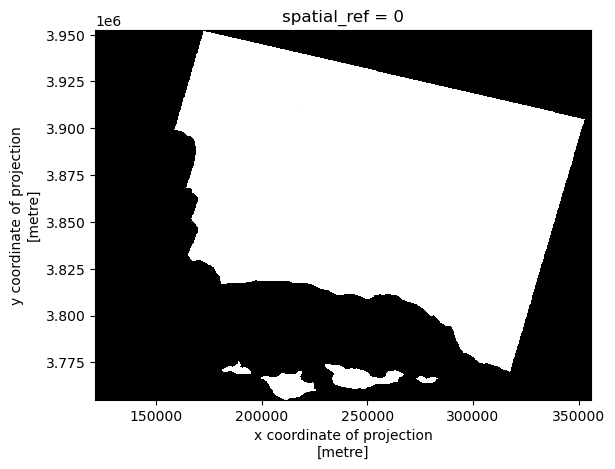

In [5]:
# Use `.plot.imshow()` to view RGB image
landsat[["red", "green", "blue"]].to_array().plot.imshow()

Adjust the scale used for plotting the bands to get a true color image. HINT: Check the robust parameter. The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting.

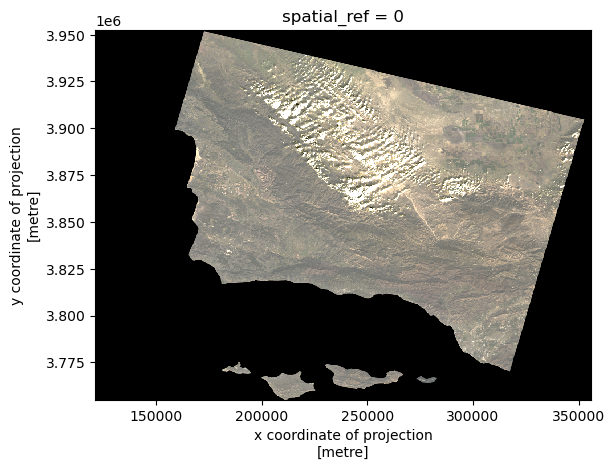

In [19]:
# Add robust = True to view true color RGB image
landsat[["red", "green", "blue"]].to_array().plot.imshow(robust = True)

In part d, our output was only in black and white. But from our data exploration, we know that there are color variables. So we have to add `robust = True` to the `.imshow()` in order to actually see the color imagery, as we did in part e.

## False color image

Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

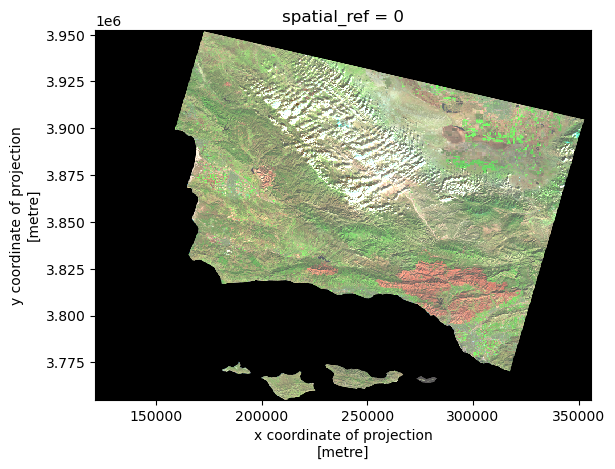

In [7]:
# Plot false color image
landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(robust = True)

## Map
Create a map showing the shortwave infrared/near-infrared/red false color image together with the Thomas Fire perimeter. Customize it appropriately including, at least, an informative title and legend.

Write a figure description for the map including a brief explanation of how false color imagery is being used.

In [8]:
# Examine CRss
print('thomas_fire CRS: ', thomas_fire.crs)
print('landsat CRS: ', landsat.rio.crs)

thomas_fire CRS:  EPSG:3857
landsat CRS:  EPSG:32611


In [9]:
# Reproject thomas_fire to landsat crs
thomas_fire = thomas_fire.to_crs(landsat.rio.crs)
print('Matched CRS?',  thomas_fire.crs == landsat.rio.crs)

Matched CRS? True


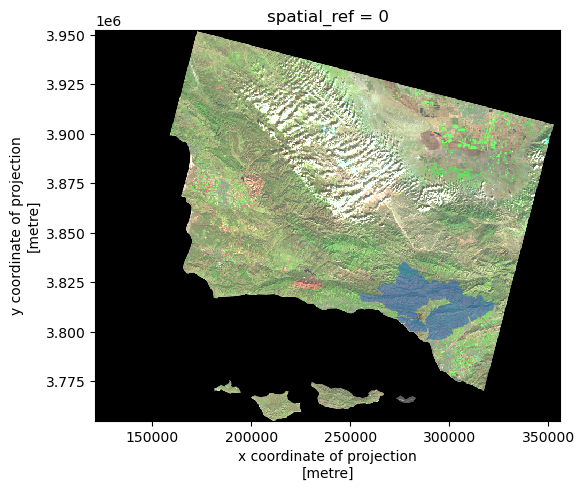

In [10]:
# Set aspect ratio
landsat_aspect_ratio = landsat.rio.width / landsat.rio.height

# Plot together
fig, ax = plt.subplots(figsize=(6, 6 * landsat_aspect_ratio))  
landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(robust = True, ax=ax)
thomas_fire.plot(ax=ax, alpha=0.6)
plt.show()

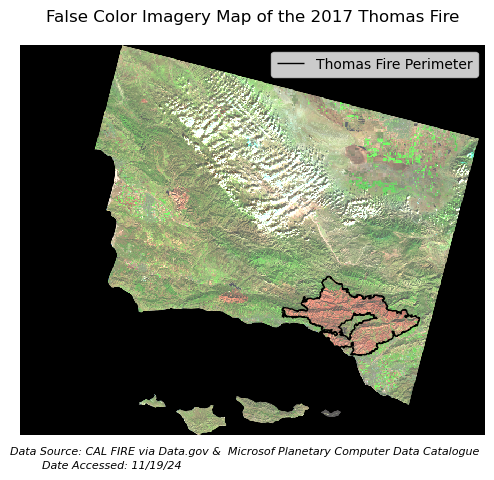

In [20]:
# plot together with perimeter and labels
fig, ax = plt.subplots(figsize=(6, 6 * landsat_aspect_ratio))  
landsat[["swir22", "nir08", "red"]].to_array().plot.imshow(robust = True, ax=ax)
thomas_fire.boundary.plot(ax=ax, linewidth=1, edgecolor='black', label = "Thomas Fire Perimeter")

ax.set_axis_off()
ax.set_title('False Color Imagery Map of the 2017 Thomas Fire')
fig.text(0.5, 0.2,
         'Data Source: CAL FIRE via Data.gov &  Microsof Planetary Computer Data Catalogue',
         ha='center', va='center', fontsize=8, color='black', fontstyle='italic')
fig.text(0.395, 0.18,
         'Date Accessed: 11/19/24',
         ha='right', va='center', fontsize=8, color='black', fontstyle='italic')
ax.legend(loc='upper right')
plt.show()

In [12]:
# Clip data
landsat_small = landsat.rio.clip_box(*thomas_fire.total_bounds)

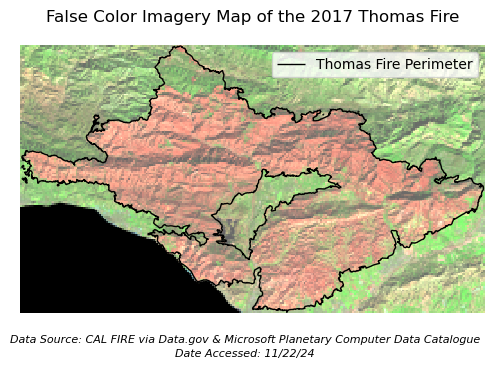

In [24]:
# Plot clipped data
fig, ax = plt.subplots(figsize=(6, 6 * landsat_aspect_ratio))  
landsat_small[["swir22", "nir08", "red"]].to_array().plot.imshow(robust = True, ax=ax)
thomas_fire.boundary.plot(ax=ax, linewidth=1, edgecolor='black', label = "Thomas Fire Perimeter")

ax.set_axis_off()
ax.set_title('False Color Imagery Map of the 2017 Thomas Fire')
fig.text(0.5, 0.27, 'Data Source: CAL FIRE via Data.gov & Microsoft Planetary Computer Data Catalogue', ha='center', va='center', fontsize=8, color='black', fontstyle='italic') 
fig.text(0.5, 0.25, 'Date Accessed: 11/22/24', ha='center', va='center', fontsize=8, color='black', fontstyle='italic')
ax.legend(loc='upper right')
fig.savefig('landsat_map_thomas_fire.png', dpi=300, bbox_inches='tight')
plt.show()

False color imagery is being used to show the scar from the 2017 Thomas Fire. We can see that the color is significantly different inside the Thomas Fire Perimeter. The difference in color indicates a difference in vegetation (ie. dead vs alive) which more easily shows us the effects of the Thomas Fire than a true color image would